In [5]:
import matplotlib.pyplot as plt
from coffea.util import load
from pocket_coffea.utils.plot_utils import Shape
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_png { height: auto; }</style>"))
import pickle
import numpy as np
import os
if not os.path.exists('hists'):
    os.makedirs('hists')
import awkward as ak
from omegaconf import OmegaConf
import math
import mplhep as hep

In [2]:
o = load("out_columns/output_allColumns_2018.coffea")
o2 = load("output_newconfig11_TTbbDiLeptonic_Powheg_2018.coffea")
parameters_dump = OmegaConf.load("/afs/cern.ch/user/r/rmccarth/public/plotting_style.yaml")

In [3]:
print(o['columns']['THW__nominal']['THW__2018']['baseline'].keys())
print(o['columns'].keys())
print("\n\n\n")
print(o['cutflow']['initial'].keys())

dict_keys(['weight_nominal', 'weight_pileupUp', 'weight_pileupDown', 'weight_sf_ele_recoUp', 'weight_sf_ele_recoDown', 'weight_sf_ele_idUp', 'weight_sf_ele_idDown', 'weight_sf_mu_idUp', 'weight_sf_mu_idDown', 'weight_sf_mu_isoUp', 'weight_sf_mu_isoDown', 'weight_sf_jet_puIdUp', 'weight_sf_jet_puIdDown', 'weight_sf_btag_hfUp', 'weight_sf_btag_hfDown', 'weight_sf_btag_lfUp', 'weight_sf_btag_lfDown', 'weight_sf_btag_hfstats1Up', 'weight_sf_btag_hfstats1Down', 'weight_sf_btag_hfstats2Up', 'weight_sf_btag_hfstats2Down', 'weight_sf_btag_lfstats1Up', 'weight_sf_btag_lfstats1Down', 'weight_sf_btag_lfstats2Up', 'weight_sf_btag_lfstats2Down', 'weight_sf_btag_cferr1Up', 'weight_sf_btag_cferr1Down', 'weight_sf_btag_cferr2Up', 'weight_sf_btag_cferr2Down', 'JetGood_N', 'JetGood_eta', 'JetGood_pt', 'JetGood_phi', 'JetGood_btagDeepFlavB', 'JetGood_genJetIdx', 'FatJetGood_N', 'FatJetGood_eta', 'FatJetGood_pt', 'FatJetGood_phi', 'FatJetGood_mass', 'FatJetGood_msoftdrop', 'FatJetGood_tau1', 'FatJetGood_t

In [3]:
def getName(sam_name):
    sam_namey = sam_name+'__2018'
    if 'ttHToNonbb' in sam_name: sam_namey ='ttHToNonbb_Powheg_2018'
    if 'DYJetsToLL_M-50' in sam_name: sam_namey ='DYJetsToLL_M-50_v7__2018'
    if 'ZJetsToQQ' in sam_name: sam_namey = sam_name + '_v7__2018'
    if 'ST' in sam_name: sam_namey = sam_name + '_v7__2018'
    if 'QCD' in sam_name: sam_namey = sam_name + '_v7__2018'
    if 'WJets' in sam_name: sam_namey = sam_name + '_v7__2018' 
    if 'WJetsToLNu' in sam_name: sam_namey = sam_name + '__2018'
    if 'TTWJets' in sam_name: sam_namey = sam_name + '__2018'
    if 'TTGJets' in sam_name: sam_namey = sam_name + '__2018'
    if 'THW' in sam_name: sam_namey = sam_name + '__2018'
    if 'WW' in sam_name: sam_namey = sam_name + '__2018'
    if 'WZ' in sam_name: sam_namey = sam_name + '__2018'
    if 'ZZ' in sam_name: sam_namey = sam_name + '__2018'
    if 'ttHTobb' in sam_name: sam_namey = sam_name + '_2018'
    return sam_namey

def getPlotParams(var):
    #return format: bins, xmin, xmax, label
    col = var.split("_")[0]
    quantity = var.split("_")[1]
    if quantity == 'eta':
        return 30, -2.5, 2.5, fr"{col} $\eta$"
    if quantity == 'phi':
        return 32, -math.pi, math.pi, fr"{col} $\phi$"
    if ("FatJet" in col) and not ("N" in quantity) and not ("Flavour" in quantity):
        if quantity == 'pt':
            return 100, 0, 1000, r"FatJet $p_{T}$ [GeV]"
        elif quantity == 'mass':
            return 50, 0, 400, r"FatJet mass [GeV]"
        elif quantity == 'msoftdrop':
            return 50, 0, 400, r"FatJet $m_{SD}$ [GeV]"
        elif quantity == 'rho':
            return 100, -8, 0, r"FatJet $\rho$"
        elif quantity == 'rhoQCD':
            return 100, -3, 0.5, r"FatJet $\rho$QCD"
        elif quantity == 'tau1':
            return 20, 0, 1, r"$\tau_{1}$"
        elif quantity == 'tau2':
            return 20, 0, 1, r"$\tau_{2}$"
        elif quantity == 'tau3':
            return 20, 0, 1, r"$\tau_{3}$"
        elif quantity == 'tau4':
            return 20, 0, 1, r"$\tau_{4}$"
        else:
            return 20, 0, 1, f"{col}"
    elif "Jet" in col and not ("N" in quantity)and not ("Flavour" in quantity):
        if quantity == 'pt':
            return 100, 0, 1000, r"Jet $p_{T}$ [GeV]"
        elif quantity == 'btagDeepFlavB':
            return 30, 0, 1, "AK4 DeepJet b-tag score"
        elif quantity == 'mass':
            return 50, 0, 400, r"Jet mass [GeV]"
    else:
        return -1, -1, -1, ""

2018 baseline JetGood_pt
n [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.54245803e+03
  3.73366566e+03  6.09450718e+03  7.55522403e+03  8.99224834e+03
  9.47666429e+03  1.03256377e+04  1.02981707e+04  1.06493148e+04
  1.06125284e+04  1.07097969e+04  1.05708118e+04  1.01641262e+04
  9.05597975e+03  8.10404452e+03  6.25398957e+03  3.88938863e+03
  2.89693321e+03  2.51379652e+03  2.17404088e+03  1.76642224e+03
  1.47727137e+03  1.08423441e+03  1.07351316e+03  9.84235646e+02
  8.23309137e+02  6.23895949e+02  5.41679384e+02  4.77391070e+02
  3.77057893e+02  2.58526135e+02  2.11751611e+02  1.92278286e+02
  2.04967595e+02  1.75458209e+02  1.04828405e+02  1.20135640e+02
  1.51110633e+02  1.11194047e+02  8.29424520e+01  6.47149942e+01
  4.74071900e+01  4.12104300e+01  6.88560356e+01  4.44788998e+01
  3.18530702e+01  1.93747260e+01  9.42197834e+00  5.77594303e+00
  2.28463345e+01  1.68078009e+01  2.55802046e+01  2.64789229e+01
  7.10673420e+00  1.87020873e+01 -1.81421817e+00  6.34695481e+0

/tmp/rmccarth/ipykernel_3273584/2419129357.py:141: RuntimeWarning: invalid value encountered in true_divide
  ratio_up = np.where(n[-1] > 0, up / n[-1], 1)
/tmp/rmccarth/ipykernel_3273584/2419129357.py:142: RuntimeWarning: invalid value encountered in true_divide
  ratio_down = np.where(n[-1] > 0, down / n[-1], 1)
/tmp/rmccarth/ipykernel_3273584/2419129357.py:191: RuntimeWarning: invalid value encountered in true_divide
  ratio = nData/n[-1]
/tmp/rmccarth/ipykernel_3273584/2419129357.py:192: RuntimeWarning: invalid value encountered in true_divide
  ratio_error = error/n[-1]


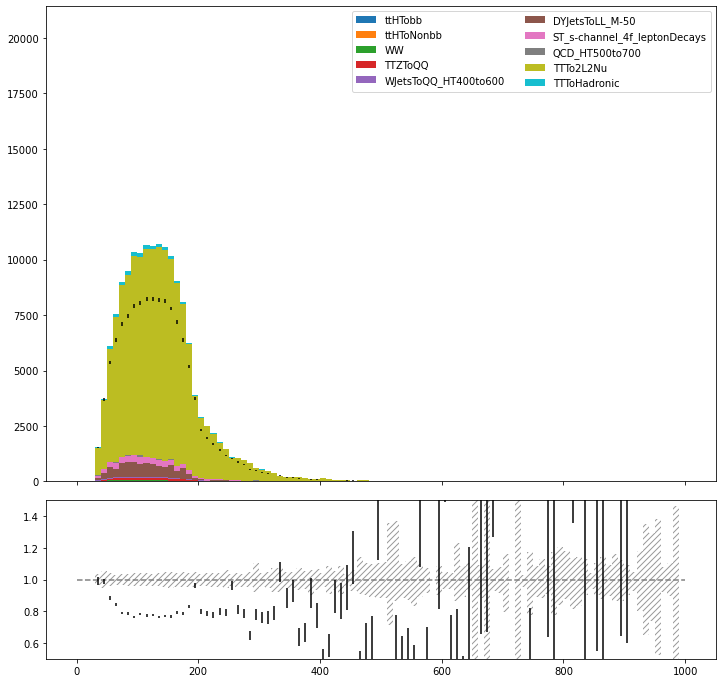

2018 ee JetGood_pt
n [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.90946713e+02
  6.87099608e+02  1.24536644e+03  1.53622501e+03  2.04100114e+03
  2.02558275e+03  2.27352481e+03  2.09998749e+03  2.19855739e+03
  2.23005072e+03  2.31144129e+03  2.24539574e+03  2.24201177e+03
  1.88920243e+03  1.65718489e+03  1.25986440e+03  8.03290446e+02
  5.17831235e+02  4.89964333e+02  5.11392316e+02  3.42582867e+02
  2.57721032e+02  2.38227571e+02  2.40386287e+02  2.29386408e+02
  1.58098357e+02  1.11014616e+02  9.32908665e+01  1.48610982e+02
  9.88955556e+01  5.82149440e+01  4.38508700e+01  5.62835395e+01
  5.20906956e+01  6.93907628e+01  2.46010194e+01  3.14667414e+01
  1.92223899e+01  3.05288671e+01  6.54742910e+00  3.53238691e+00
  9.34179407e+00  1.30087843e+01  2.09752192e+01  5.00431754e+00
  5.31516114e+00  3.62286872e+00  7.67311319e+00  4.95120599e+00
  3.54355071e+00  1.07526419e+00  1.29057603e+00  1.59395138e+01
  2.25527823e-01  7.78286820e+00 -7.27244074e+00  2.07221990e+00
  3.

/tmp/rmccarth/ipykernel_3273584/2419129357.py:141: RuntimeWarning: invalid value encountered in true_divide
  ratio_up = np.where(n[-1] > 0, up / n[-1], 1)
/tmp/rmccarth/ipykernel_3273584/2419129357.py:142: RuntimeWarning: invalid value encountered in true_divide
  ratio_down = np.where(n[-1] > 0, down / n[-1], 1)
/tmp/rmccarth/ipykernel_3273584/2419129357.py:191: RuntimeWarning: invalid value encountered in true_divide
  ratio = nData/n[-1]
/tmp/rmccarth/ipykernel_3273584/2419129357.py:192: RuntimeWarning: invalid value encountered in true_divide
  ratio_error = error/n[-1]


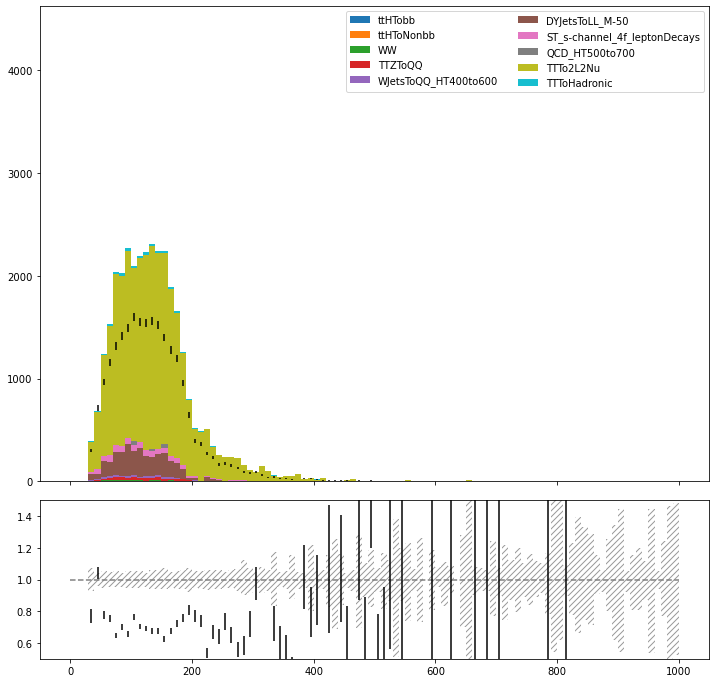

2018 emu JetGood_pt
n [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  6.34353662e+02
  1.74181291e+03  2.87119613e+03  3.58117755e+03  4.02875173e+03
  4.45066830e+03  4.90088009e+03  4.89788127e+03  5.09958485e+03
  4.99619904e+03  4.90297789e+03  5.16551661e+03  4.71330365e+03
  4.34014641e+03  3.70681164e+03  2.95838653e+03  1.95848535e+03
  1.48813623e+03  1.19989869e+03  1.06679064e+03  8.40372431e+02
  7.96584160e+02  5.17460120e+02  5.62510835e+02  4.61615449e+02
  3.81500443e+02  3.33417873e+02  2.92490127e+02  1.89905822e+02
  1.74112862e+02  1.55114453e+02  1.06392267e+02  8.37428444e+01
  8.40857086e+01  6.23763846e+01  6.08900707e+01  4.59498504e+01
  7.86313427e+01  5.34651605e+01  3.55734904e+01  3.30979843e+01
  2.66138800e+01  1.68818828e+01  3.42566652e+01  1.88075474e+01
  1.64784707e+01  8.51730910e+00  3.28010548e+00 -1.55992383e-02
  3.98564083e+00  1.38733282e+01  6.14449797e+00  8.07283878e+00
  4.77397345e+00  8.97400520e+00  5.25633081e+00  1.58192817e+00
  8

/tmp/rmccarth/ipykernel_3273584/2419129357.py:141: RuntimeWarning: invalid value encountered in true_divide
  ratio_up = np.where(n[-1] > 0, up / n[-1], 1)
/tmp/rmccarth/ipykernel_3273584/2419129357.py:142: RuntimeWarning: invalid value encountered in true_divide
  ratio_down = np.where(n[-1] > 0, down / n[-1], 1)
/tmp/rmccarth/ipykernel_3273584/2419129357.py:191: RuntimeWarning: invalid value encountered in true_divide
  ratio = nData/n[-1]
/tmp/rmccarth/ipykernel_3273584/2419129357.py:192: RuntimeWarning: invalid value encountered in true_divide
  ratio_error = error/n[-1]


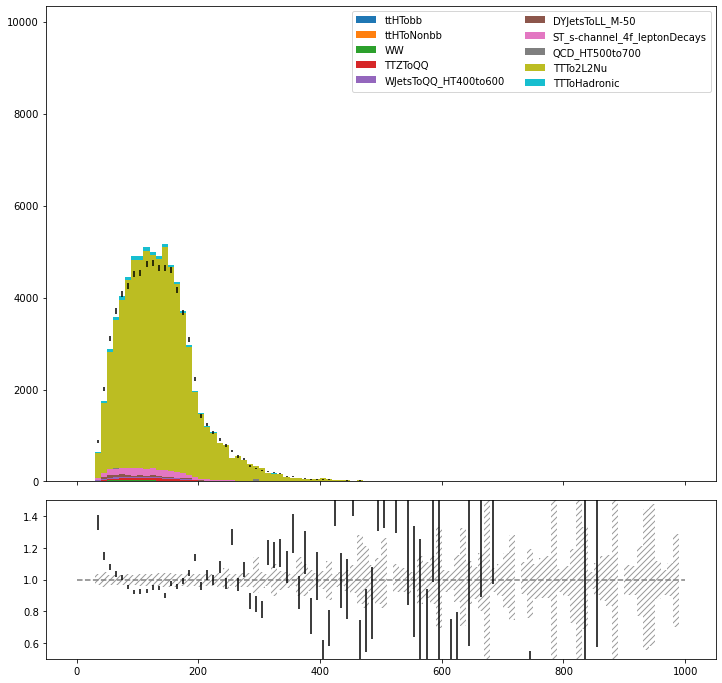

2018 mumu JetGood_pt
n [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  5.17157660e+02
  1.30475314e+03  1.97794461e+03  2.43782148e+03  2.92249547e+03
  3.00041324e+03  3.15123277e+03  3.30030190e+03  3.35117255e+03
  3.38627867e+03  3.49537769e+03  3.15989946e+03  3.20881079e+03
  2.82663091e+03  2.74004798e+03  2.03573864e+03  1.12761283e+03
  8.90965741e+02  8.23933499e+02  5.95857933e+02  5.83466944e+02
  4.22966181e+02  3.28546715e+02  2.70616037e+02  2.93233789e+02
  2.83710337e+02  1.79463461e+02  1.55898390e+02  1.38874266e+02
  1.04049475e+02  4.51967381e+01  6.15084739e+01  5.22519026e+01
  6.87911912e+01  4.36910617e+01  1.93373151e+01  4.27190480e+01
  5.32569009e+01  2.72000192e+01  4.08215325e+01  2.80846230e+01
  1.14515159e+01  1.13197629e+01  1.36241512e+01  2.06670348e+01
  1.00594384e+01  7.23454819e+00 -1.53124033e+00  8.40336269e-01
  1.53171430e+01  1.85920856e+00  1.81451306e+01  2.46657036e+00
  2.10723293e+00  1.94521391e+00  2.01891760e-01  2.69280674e+00
  

/tmp/rmccarth/ipykernel_3273584/2419129357.py:141: RuntimeWarning: invalid value encountered in true_divide
  ratio_up = np.where(n[-1] > 0, up / n[-1], 1)
/tmp/rmccarth/ipykernel_3273584/2419129357.py:142: RuntimeWarning: invalid value encountered in true_divide
  ratio_down = np.where(n[-1] > 0, down / n[-1], 1)
/tmp/rmccarth/ipykernel_3273584/2419129357.py:191: RuntimeWarning: invalid value encountered in true_divide
  ratio = nData/n[-1]
/tmp/rmccarth/ipykernel_3273584/2419129357.py:192: RuntimeWarning: invalid value encountered in true_divide
  ratio_error = error/n[-1]


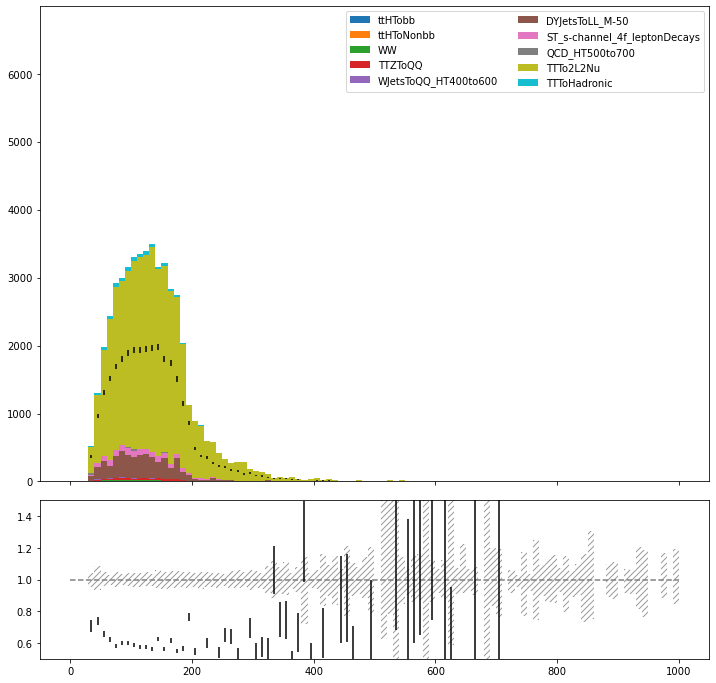

In [20]:
years = ["2018"]
cats = ["baseline","ee","emu","mumu"]
dataSamples = []
for sample in o['columns'].keys():
    if 'DATA' in sample:
        dataSamples.append(sample)
first_sample = 'TTTo2L2Nu'
for year in years:
    for cat in cats: 
        #vars = o['columns'][first_sample+"__nominal"][getName(first_sample)][cat].keys()
        vars = ['JetGood_pt']
        for var in vars:
            if(("weight" in var) or ("Idx" in var) or ("Ttbar" in var)):
                continue
            print(year, cat, var)
            col = var.split("_")[0]
            quantity = var.split("_")[1]
            all_MC = {}
            all_weight = {}
            for label, samples in parameters_dump['plotting_style']['samples_groups'].items():
                label_data = []
                label_weight = {}
                for sample in samples:
                    weight = {}
                    ttbb_weight = {}
                    name = getName(sample)
                    if(("V2" in var) and ("v7" in name)):
                        data = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][var[:-2]].value)
                    else:
                        data = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][var].value)
                    
                    for weightVar in o['columns'][first_sample+"__nominal"][getName(first_sample)][cat].keys():          
                        if ("weight" in weightVar):
                            weight[weightVar] = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][weightVar].value)
                            weight[weightVar] = weight[weightVar] / o['sum_genweights'][name]
                    A = o['sum_genweights_ttB'][name]
                    if(sample=="TTTo2L2Nu"):
                            genTtbarId = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat]["events_genTtbarId"].value) % 100
                            tt_ttb_mask = genTtbarId > 50
                            for key in weight:
                                weight[key] = weight[key][~tt_ttb_mask]
                            if(("V2" in var) and ("v7" in name)):
                                ttbb_data = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][var[:-2]].value)
                            else:
                                ttbb_data = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][var].value)
                            genTtbarId = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat]["events_genTtbarId"].value) % 100
                            ttbb_ttb_mask = genTtbarId > 50
                            B = o2['sum_genweights_ttB']['TTbbDiLeptonic_Powheg_2018']
                            for weightVar in o['columns'][first_sample+"__nominal"][getName(first_sample)][cat].keys():
                                if ("weight" in weightVar):
                                    ttbb_weight[weightVar] = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][weightVar].value)
                                    ttbb_weight[weightVar] = ttbb_weight[weightVar] / o2['sum_genweights']['TTbbDiLeptonic_Powheg_2018']
                                    ttbb_weight[weightVar] = ttbb_weight[weightVar][ttbb_ttb_mask]
                                    ttbb_weight[weightVar] = ttbb_weight[weightVar] * (A/B)
                            
                            if(quantity!="N" and col!="events"):
                                colN = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][col+"_N"].value)
                                data = ak.unflatten(data,colN)
                                data = ak.max(data,axis=1)
                                ttbb_colN = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][col+"_N"].value)
                                ttbb_data = ak.unflatten(ttbb_data,ttbb_colN)
                                ttbb_data = ak.max(ttbb_data,axis=1)
                            data = data[~tt_ttb_mask]
                            ttbb_data = ttbb_data[ttbb_ttb_mask]
                            data = ak.concatenate((data,ttbb_data),axis=0)
                            for key in weight:
                                weight[key] = ak.concatenate((weight[key],ttbb_weight[key]),axis=0)
                    
                    elif(quantity!="N" and col!="events"):
                        colN = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][col+"_N"].value)
                        data = ak.unflatten(data,colN)
                        data = ak.max(data,axis=1)
                    for key in weight:
                        weight[key], data = ak.broadcast_arrays(weight[key],data)
                    none_mask = ak.is_none(data)
                    data = data[~none_mask]
                    for key in weight:
                        weight[key] = weight[key][~none_mask]
                    inf_mask = np.isinf(data)
                    data = data[~inf_mask]
                    for key in weight:
                        weight[key] = weight[key][~inf_mask]
                    label_data = ak.concatenate((label_data,data),axis=0)
                    for key in weight:
                        if key not in label_weight:
                            label_weight[key] = []
                        label_weight[key] = ak.concatenate((label_weight[key],weight[key]),axis=0)
                all_MC[label] = label_data
                for key in label_weight:
                    if key not in all_weight:
                        all_weight[key] = {}
                    all_weight[key][label] = label_weight[key]
            bins, xmin, xmax, label = getPlotParams(var)
            f2, a2 = plt.subplots()
            if not ("Gen" in var) and not ("gen" in var):
                fig, (ax, rax) = plt.subplots(2, 1, figsize=[12,12], gridspec_kw={"height_ratios": [3,1]}, sharex=True)
                fig.subplots_adjust(hspace=0.06)
                if(bins==-1):
                    n, bin_edges, patches = ax.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()))
                else:
                    n, bin_edges, patches = ax.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()),bins=bins,range=(xmin,xmax))
                n_sys = {}
                for key in all_weight:
                    if key=="weight_nominal":
                        continue
                    n_total = np.zeros_like(n[-1])
                    for label in all_weight[key]:
                        hist_n, hist_bins = np.histogram(all_MC[label],weights=all_weight[key][label],bins=bin_edges)
                        n_total += hist_n
                    n_sys[key] = n_total
                
                #systematic error band
                err2_up = np.zeros_like(n[-1])
                err2_down = np.zeros_like(n[-1])
                for key in n_sys:
                    if "Down" in key:
                        continue
                    downString = key[:-2]+"Down"
                    err_up = n_sys[key] - n[-1]
                    err_down = n_sys[downString] - n[-1]
                    # Compute the flags to check which of the two variations (up and down) are pushing the nominal value up and down
                    up_is_up = err_up > 0
                    down_is_down = err_down < 0
                    # Compute the flag to check if the uncertainty is one-sided, i.e. when both variations are up or down
                    is_onesided = up_is_up ^ down_is_down
                    # Sum in quadrature of the systematic uncertainties taking into account if the uncertainty is one- or double-sided
                    err2_up_twosided = np.where(up_is_up, err_up**2, err_down**2)
                    err2_down_twosided = np.where(up_is_up, err_down**2, err_up**2)
                    err2_max = np.maximum(err2_up_twosided, err2_down_twosided)
                    err2_up_onesided = np.where(is_onesided & up_is_up, err2_max, 0)
                    err2_down_onesided = np.where(is_onesided & down_is_down, err2_max, 0)
                    err2_up_combined = np.where(is_onesided, err2_up_onesided, err2_up_twosided)
                    err2_down_combined = np.where(
                        is_onesided, err2_down_onesided, err2_down_twosided
                    )
                    err2_up += err2_up_combined
                    err2_down += err2_down_combined
                up = n[-1] + np.sqrt(err2_up)
                down = n[-1] - np.sqrt(err2_down)
                ratio_up = np.where(n[-1] > 0, up / n[-1], 1)
                ratio_down = np.where(n[-1] > 0, down / n[-1], 1)
                unc_band = np.array([ratio_down, ratio_up])
                '''rax.fill_between(
                    bin_edges[:-1],
                    ratio_up,
                    ratio_down,
                    label="syst. unc.",
                    color= [0.,0.,0.,0.4],
                    facecolor= [0.,0.,0.,0.],
                    hatch= "////",
                    linewidth= 0,
                )'''
                rax.fill_between(
                    bin_edges,
                    np.r_[unc_band[0], unc_band[0, -1]],
                    np.r_[unc_band[1], unc_band[1, -1]],
                    label="syst. unc.",
                    color= [0.,0.,0.,0.4],
                    facecolor= [0.,0.,0.,0.],
                    hatch= "////",
                    linewidth= 0,
                    step= 'post',
                    zorder= 2
                )
                rax.hlines(
                    1.0, *bin_edges[[0, -1]], colors='gray', linestyles='dashed'
                )
                
                ax.legend(ncol=2,loc="upper right")
                nData = [0.0]*len(bin_edges[:-1])
                for sample in dataSamples:
                    for name in o['columns'][sample].keys():
                        data = ak.from_numpy(o['columns'][sample][name][cat][var].value)
                        if(quantity!="N" and col!="events"):
                            colN = ak.from_numpy(o['columns'][sample][name][cat][col+"_N"].value)
                            data = ak.unflatten(data,colN)
                            data = ak.max(data,axis=1)
                        none_mask = ak.is_none(data)
                        data = data[~none_mask]
                        inf_mask = np.isinf(data)
                        data = data[~inf_mask]
                        n_data, bin_edges_data, patches_data = a2.hist(data,bins=bin_edges)
                        nData += n_data
                error = np.sqrt(nData)
                binCenters = (bin_edges_data[:-1] + bin_edges_data[1:]) / 2
                ratio = nData/n[-1]
                ratio_error = error/n[-1]
                ratio_error[np.isnan(ratio_error)] = np.inf
                ax.errorbar(binCenters, nData, yerr=error,linestyle='None',markersize=5.0,color='black')
                rax.errorbar(binCenters, ratio, yerr=ratio_error,linestyle='None',markersize=5.0,color='black')
                rax.set_ylim((0.5, 1.5))
                max_data = max(nData)
                max_MC = max(n[-1])
                if(max_data>max_MC):
                    ax.set_ylim((0, 2.0 * max_data))
                else:
                    ax.set_ylim((0, 2.0 * max_MC))
            else:
                f1, a1 = plt.subplots()
                if(bins==-1):
                    n, bin_edges, patches = a1.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()))
                else:
                    n, bin_edges, patches = a1.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()),bins=bins,range=(xmin,xmax))
                ax.legend(ncol=2,loc="upper right")
            
            plt.close(f2)
            plt.savefig("hists/"+year+"_"+cat+"_"+var+".pdf")
            plt.show()
            plt.clf()
            plt.cla()
            plt.close()

2018 baseline JetGood_eta
weight_pileupUp
err2_up [1.06724895e+01 5.46562425e+03 4.00765041e+03 6.86902725e+03
 1.25849134e+04 6.43569480e+03 1.10171759e+04 6.03235500e+03
 5.98766171e+03 1.58625697e+04 1.91935586e+04 4.13814182e+04
 5.78627993e+02 2.75302424e+04 8.99919692e+02 1.39612940e+04
 2.51493848e+04 2.23086085e+04 1.13627592e+04 1.59889859e+04
 3.85388334e+03 1.94368421e+04 2.96041833e+03 1.55005383e+03
 1.82545395e+03 3.15500775e+03 2.29034221e+03 1.07263398e+04
 3.07189854e+03 9.90272107e+01]
err2_down [2.00617787e+00 2.27490035e+03 1.42436243e+03 4.23573901e+03
 4.89104873e+03 4.16800848e+03 6.88182501e+03 3.49839264e+03
 3.20686085e+03 9.25946715e+03 8.35279802e+03 1.67788459e+04
 2.01269861e+02 1.31616297e+04 6.99276917e+02 7.70079996e+03
 1.38337018e+04 1.22446726e+04 5.71745016e+03 8.54633516e+03
 2.27437997e+03 1.31787314e+04 1.97854805e+03 1.80766337e+02
 8.48546586e+02 3.65489923e+03 1.55815637e+03 6.37039482e+03
 2.96163609e+03 7.83128232e+01]
weight_sf_ele_recoUp
e

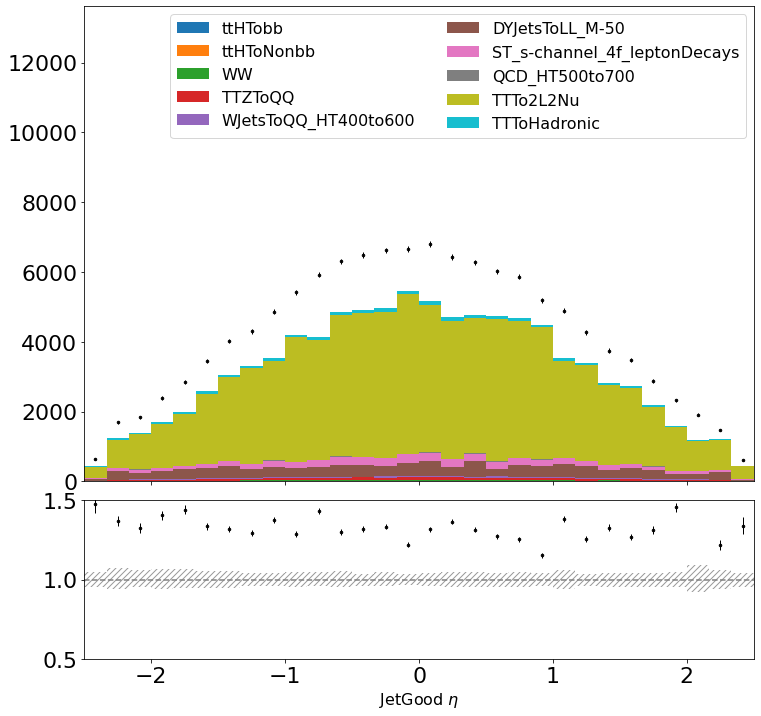

2018 ee JetGood_eta
weight_pileupUp
err2_up [ 133.46330026  812.3535253   652.98130327 1050.93569522 4202.44689562
 1394.65511555  125.56633936 1095.22857548 1136.95874811 1242.46107704
  488.25592671 2843.32168269   43.56765262 1497.59600848   45.46795052
 4344.58339286 7284.30869022 2032.81621577  996.31911352  554.43292734
 1159.07870205 1423.2782901  2538.04423601  634.62943927   79.99415994
 1639.68868616  155.98718009  471.98916666  564.76337611   25.280147  ]
err2_down [  62.0929731   471.67052315  156.57190324  603.38781361 1944.83362282
  959.46411246  257.80295501  283.47953277  558.95434462  327.5398254
  731.32371061 1383.57763721    6.4599207   771.36052452    0.
 2029.28001038 4374.69810425  510.1190955   939.59771278   61.02608656
  649.25077443 1175.94123166  838.20569753  183.42548191   48.86363047
 1112.32353881  151.89321984  144.66244028  377.9854938    11.21927134]
weight_sf_ele_recoUp
err2_up [  3.02272593  12.14619874   7.62450776  22.83822722  26.5948209
  53.33

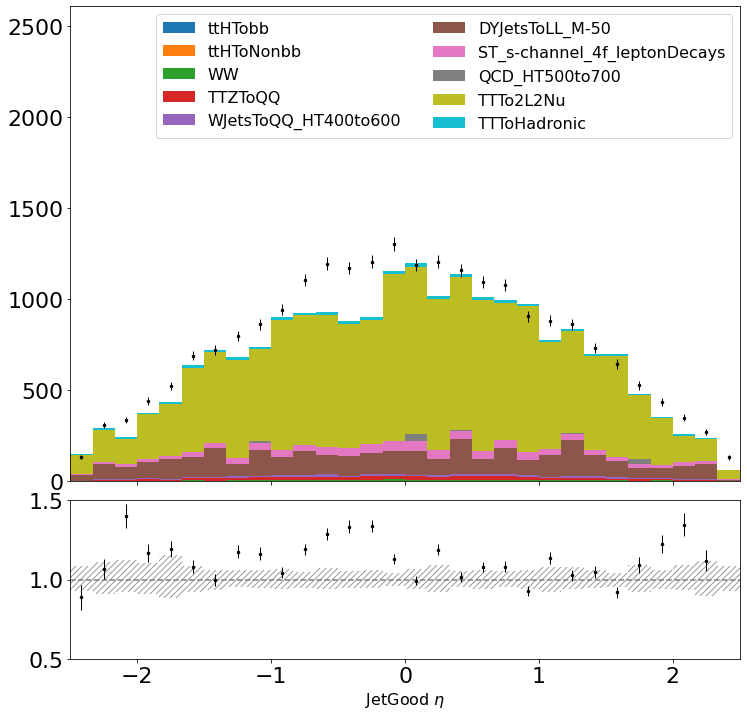

2018 emu JetGood_eta
weight_pileupUp
err2_up [1.93733888e+00 8.15257279e+02 4.73902843e+02 3.25161396e+02
 2.05957991e+02 6.23450990e+02 3.73736540e+03 4.90362213e+00
 1.26890066e+02 4.06077922e+02 3.08527587e+03 5.64644026e+03
 5.83200132e-01 1.29186866e+03 5.92573785e-01 0.00000000e+00
 5.94492140e+02 2.41617481e+03 2.28071164e+03 3.31037007e+03
 6.55940575e+00 3.63018788e+02 0.00000000e+00 1.17186861e+02
 5.84574520e-01 2.76544681e+02 1.97903389e+03 1.62461330e+03
 2.09141957e+00 4.68377253e+01]
err2_down [0.00000000e+00 3.20771287e+02 1.23180160e+02 4.41059149e+02
 1.69887667e+02 2.63932293e+02 1.08890394e+03 2.79797385e+02
 1.92428306e+02 1.29431751e+03 1.21753693e+03 1.21658227e+03
 1.10266244e+02 1.16512017e+03 8.50992287e+01 4.87896043e+01
 6.56873432e+02 1.85735280e+03 3.17464266e+02 2.11550042e+03
 1.15606204e+01 5.48827249e+02 1.07437443e+02 1.87525765e+00
 3.47050176e+01 4.88963300e+02 8.45427484e+02 7.54899436e+02
 5.16766439e+01 4.83830946e+01]
weight_sf_ele_recoUp
err2_u

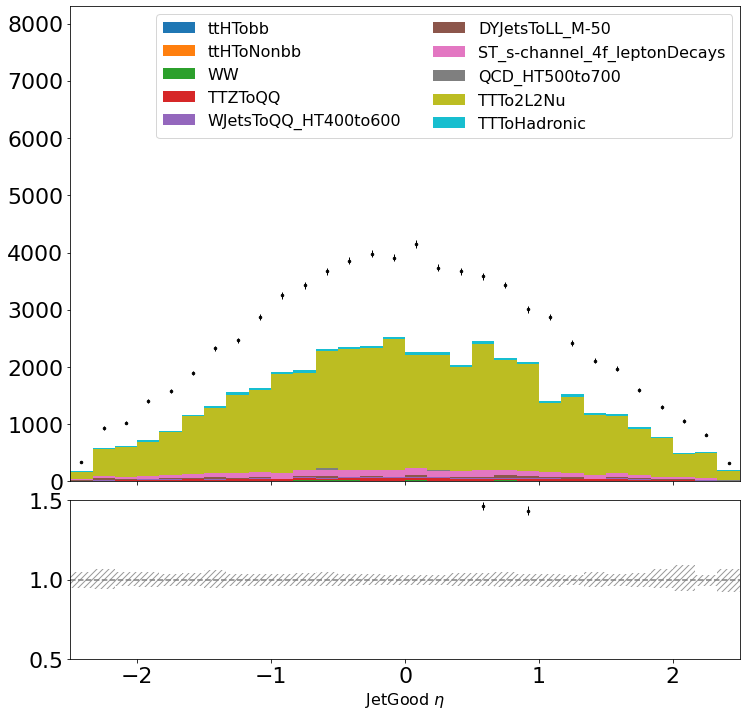

2018 mumu JetGood_eta
weight_pileupUp
err2_up [9.51581498e+01 2.84776885e+02 2.55462605e+02 1.05165459e+03
 1.08932879e+03 3.20721542e+02 1.06426675e+03 3.75783027e+03
 1.04954064e+03 4.97684497e+03 3.70869376e+03 5.61879569e+03
 6.67325782e+02 8.33222800e+03 6.13343764e+02 3.50812436e+03
 2.38683099e+03 3.03813740e+03 7.43921488e+02 2.05801469e+03
 6.48887718e+02 6.82881804e+03 2.83112535e+01 2.41748725e+02
 1.57390587e+03 1.42800101e+03 3.71426543e+00 1.72525927e+03
 1.50921424e+03 1.41113035e+02]
err2_down [ 202.55089309   65.09019637  199.63432531  380.92084547  163.88272749
  300.63760572 1149.34410032 1982.45545382  365.38642077 1776.74382182
  867.73982285 3301.32659053  105.81757892 2789.62612411  574.17327292
 1808.52310986  668.00100248 2022.55419196  736.76619935 1493.04200672
  353.81493114 3258.08004255   26.66573017  115.06335593  524.59986572
 1912.65229498   83.14333366 1625.03717297 1326.798184    152.36802741]
weight_sf_ele_recoUp
err2_up [0. 0. 0. 0. 0. 0. 0. 0. 0. 0

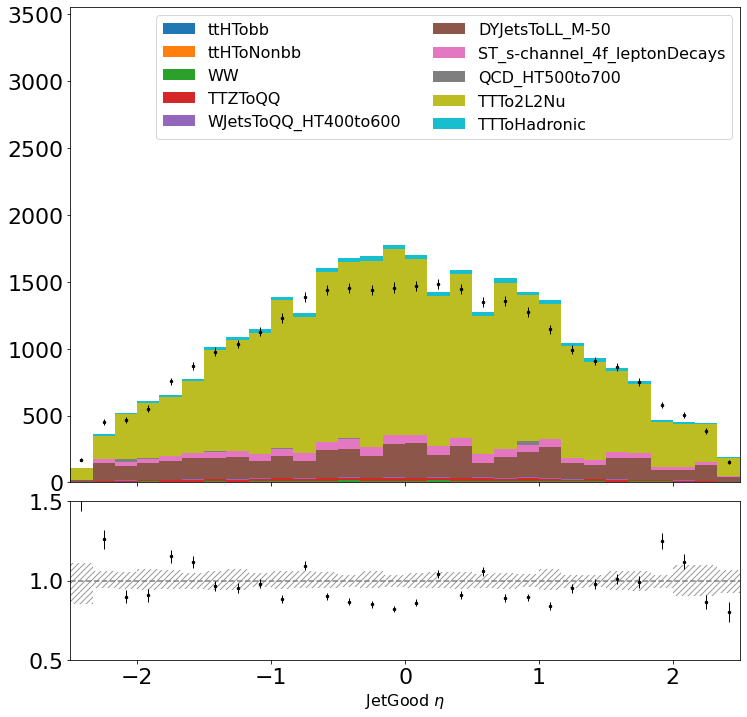

In [9]:
years = ["2018"]
cats = ["baseline","ee","emu","mumu"]
dataSamples = []
for sample in o['columns'].keys():
    if 'DATA' in sample:
        dataSamples.append(sample)
first_sample = 'TTTo2L2Nu'
for year in years:
    for cat in cats: 
        #vars = o['columns'][first_sample+"__nominal"][getName(first_sample)][cat].keys()
        vars = ['JetGood_eta']
        for var in vars:
            if(("weight" in var) or ("Idx" in var) or ("Ttbar" in var)):
                continue
            print(year, cat, var)
            col = var.split("_")[0]
            quantity = var.split("_")[1]
            all_MC = {}
            all_weight = {}
            for label, samples in parameters_dump['plotting_style']['samples_groups'].items():
                label_data = []
                label_weight = {}
                for sample in samples:
                    weight = {}
                    ttbb_weight = {}
                    name = getName(sample)
                    if(("V2" in var) and ("v7" in name)):
                        data = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][var[:-2]].value)
                    else:
                        data = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][var].value)
                    
                    for weightVar in o['columns'][first_sample+"__nominal"][getName(first_sample)][cat].keys():          
                        if ("weight" in weightVar):
                            weight[weightVar] = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][weightVar].value)
                            weight[weightVar] = weight[weightVar] / o['sum_genweights'][name]
                    A = o['sum_genweights_ttB'][name]
                    #if(sample=="TTTo2L2Nu"):
                    if(False):
                            genTtbarId = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat]["events_genTtbarId"].value) % 100
                            tt_ttb_mask = genTtbarId > 50
                            for key in weight:
                                weight[key] = weight[key][~tt_ttb_mask]
                            if(("V2" in var) and ("v7" in name)):
                                ttbb_data = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][var[:-2]].value)
                            else:
                                ttbb_data = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][var].value)
                            genTtbarId = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat]["events_genTtbarId"].value) % 100
                            ttbb_ttb_mask = genTtbarId > 50
                            B = o2['sum_genweights_ttB']['TTbbDiLeptonic_Powheg_2018']
                            for weightVar in o['columns'][first_sample+"__nominal"][getName(first_sample)][cat].keys():
                                if ("weight" in weightVar):
                                    ttbb_weight[weightVar] = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][weightVar].value)
                                    ttbb_weight[weightVar] = ttbb_weight[weightVar] / o2['sum_genweights']['TTbbDiLeptonic_Powheg_2018']
                                    ttbb_weight[weightVar] = ttbb_weight[weightVar][ttbb_ttb_mask]
                                    ttbb_weight[weightVar] = ttbb_weight[weightVar] * (A/B)
                            
                            if(quantity!="N" and col!="events"):
                                colN = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][col+"_N"].value)
                                data = ak.unflatten(data,colN)
                                pt_data = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][col+"_pt"].value)
                                pt_data = ak.unflatten(pt_data,colN)
                                sortIndices = ak.argsort(pt_data,ascending=False)
                                data = data[sortIndices]
                                data = ak.mask(data, ak.num(data) > 1)[:, 0]
                                ttbb_colN = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][col+"_N"].value)
                                ttbb_data = ak.unflatten(ttbb_data,ttbb_colN)
                                ttbb_pt_data = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][col+"_pt"].value)
                                ttbb_pt_data = ak.unflatten(ttbb_pt_data,ttbb_colN)
                                sortIndices = ak.argsort(ttbb_pt_data,ascending=False)
                                ttbb_data = ttbb_data[sortIndices]
                                ttbb_data = ak.mask(ttbb_data, ak.num(ttbb_data) > 1)[:, 0]
                            data = data[~tt_ttb_mask]
                            ttbb_data = ttbb_data[ttbb_ttb_mask]
                            data = ak.concatenate((data,ttbb_data),axis=0)
                            for key in weight:
                                weight[key] = ak.concatenate((weight[key],ttbb_weight[key]),axis=0)
                    
                    elif(quantity!="N" and col!="events"):
                        colN = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][col+"_N"].value)
                        data = ak.unflatten(data,colN)
                        pt_data = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][col+"_pt"].value)
                        pt_data = ak.unflatten(pt_data,colN)
                        sortIndices = ak.argsort(pt_data,ascending=False)
                        data = data[sortIndices]
                        data = ak.mask(data, ak.num(data) > 1)[:, 0]
                    for key in weight:
                        weight[key], data = ak.broadcast_arrays(weight[key],data)
                    none_mask = ak.is_none(data)
                    data = data[~none_mask]
                    for key in weight:
                        weight[key] = weight[key][~none_mask]
                    inf_mask = np.isinf(data)
                    data = data[~inf_mask]
                    for key in weight:
                        weight[key] = weight[key][~inf_mask]
                    label_data = ak.concatenate((label_data,data),axis=0)
                    for key in weight:
                        if key not in label_weight:
                            label_weight[key] = []
                        label_weight[key] = ak.concatenate((label_weight[key],weight[key]),axis=0)
                all_MC[label] = label_data
                for key in label_weight:
                    if key not in all_weight:
                        all_weight[key] = {}
                    all_weight[key][label] = label_weight[key]
            bins, xmin, xmax, xlabel = getPlotParams(var)
            f2, a2 = plt.subplots()
            if not ("Gen" in var) and not ("gen" in var):
                fig, (ax, rax) = plt.subplots(2, 1, figsize=[12,12], gridspec_kw={"height_ratios": [3,1]}, sharex=True)
                fig.subplots_adjust(hspace=0.06)
                if(bins==-1):
                    n, bin_edges, patches = ax.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()))
                else:
                    n, bin_edges, patches = ax.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()),bins=bins,range=(xmin,xmax))
                n_sys = {}
                for key in all_weight:
                    if key=="weight_nominal":
                        continue
                    n_total = np.zeros_like(n[-1])
                    for label in all_weight[key]:
                        hist_n, hist_bins = np.histogram(all_MC[label],weights=all_weight[key][label],bins=bin_edges)
                        n_total += hist_n
                    n_sys[key] = n_total
                ax.tick_params(axis='x', labelsize=22)
                ax.tick_params(axis='y', labelsize=22)
                ax.set_xlim(bin_edges[0],bin_edges[-1])
                #systematic error band
                err2_up = np.zeros_like(n[-1])
                err2_down = np.zeros_like(n[-1])
                for key in n_sys:
                    if "Down" in key:
                        continue
                    downString = key[:-2]+"Down"
                    err_up = n_sys[key] - n[-1]
                    err_down = n_sys[downString] - n[-1]
                    print(key)
                    #print("var_up",n_sys[key])
                    #print("var_down",n_sys[downString])
                    # Compute the flags to check which of the two variations (up and down) are pushing the nominal value up and down
                    up_is_up = err_up > 0
                    down_is_down = err_down < 0
                    # Compute the flag to check if the uncertainty is one-sided, i.e. when both variations are up or down
                    is_onesided = up_is_up ^ down_is_down
                    # Sum in quadrature of the systematic uncertainties taking into account if the uncertainty is one- or double-sided
                    err2_up_twosided = np.where(up_is_up, err_up**2, err_down**2)
                    err2_down_twosided = np.where(up_is_up, err_down**2, err_up**2)
                    err2_max = np.maximum(err2_up_twosided, err2_down_twosided)
                    err2_up_onesided = np.where(is_onesided & up_is_up, err2_max, 0)
                    err2_down_onesided = np.where(is_onesided & down_is_down, err2_max, 0)
                    err2_up_combined = np.where(is_onesided, err2_up_onesided, err2_up_twosided)
                    err2_down_combined = np.where(
                        is_onesided, err2_down_onesided, err2_down_twosided
                    )
                    err2_up += err2_up_combined
                    err2_down += err2_down_combined
                    print("err2_up",err2_up_combined)
                    print("err2_down",err2_down_combined)
                print("err2_up",err2_up)
                print("err2_down",err2_down)
                up = n[-1] + np.sqrt(err2_up)
                down = n[-1] - np.sqrt(err2_down)
                ratio_up = np.where(n[-1] != 0, up / n[-1], 1)
                ratio_down = np.where(n[-1] != 0, down / n[-1], 1)
                unc_band = np.array([ratio_down, ratio_up])
                
                rax.fill_between(
                    bin_edges,
                    np.r_[unc_band[0], unc_band[0, -1]],
                    np.r_[unc_band[1], unc_band[1, -1]],
                    label="syst. unc.",
                    color= [0.,0.,0.,0.4],
                    facecolor= [0.,0.,0.,0.],
                    hatch= "////",
                    linewidth= 0,
                    step= 'post',
                    zorder= 2
                )
                rax.hlines(
                    1.0, *bin_edges[[0, -1]], colors='gray', linestyles='dashed'
                )
                
                ax.legend(ncol=2,loc="upper right",fontsize=16)
                plt.xlabel(xlabel,fontsize=16)
                nData = [0.0]*len(bin_edges[:-1])
                for sample in dataSamples:
                    for name in o['columns'][sample].keys():
                        data = ak.from_numpy(o['columns'][sample][name][cat][var].value)
                        if(quantity!="N" and col!="events"):
                            colN = ak.from_numpy(o['columns'][sample][name][cat][col+"_N"].value)
                            data = ak.unflatten(data,colN)
                            pt_data = ak.from_numpy(o['columns'][sample][name][cat][col+"_pt"].value)
                            pt_data = ak.unflatten(pt_data,colN)
                            sortIndices = ak.argsort(pt_data,ascending=False)
                            data = data[sortIndices]
                            data = ak.mask(data, ak.num(data) > 1)[:, 0]
                        none_mask = ak.is_none(data)
                        data = data[~none_mask]
                        inf_mask = np.isinf(data)
                        data = data[~inf_mask]
                        n_data, bin_edges_data, patches_data = a2.hist(data,bins=bin_edges)
                        nData += n_data
                error = np.sqrt(nData)
                binCenters = (bin_edges_data[:-1] + bin_edges_data[1:]) / 2
                ratio = nData/n[-1]
                ratio_error = error/n[-1]
                ratio_error[np.isnan(ratio_error)] = np.inf
                ax.errorbar(binCenters, nData, yerr=error,linestyle='solid',markersize=5.0,color='black',elinewidth=1,linewidth=0,marker='.')
                rax.errorbar(binCenters, ratio, yerr=ratio_error,linestyle='solid',markersize=5.0,color='black',elinewidth=1,linewidth=0,marker='.')
                rax.set_ylim((0.5, 1.5))
                rax.yaxis.set_label_coords(-0.075, 1)
                rax.tick_params(axis='x', labelsize=22)
                rax.tick_params(axis='y', labelsize=22)
                max_data = max(nData)
                max_MC = max(n[-1])
                if(max_data>max_MC):
                    ax.set_ylim((0, 2.0 * max_data))
                else:
                    ax.set_ylim((0, 2.0 * max_MC))
            else:
                f1, a1 = plt.subplots()
                if(bins==-1):
                    n, bin_edges, patches = a1.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()))
                else:
                    n, bin_edges, patches = a1.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()),bins=bins,range=(xmin,xmax))
                ax.legend(ncol=2,loc="upper right")
            
            plt.close(f2)
            plt.savefig("hists/"+year+"_"+cat+"_"+var+".pdf")
            plt.show()
            plt.clf()
            plt.cla()
            plt.close()

2018 baseline JetGood_eta


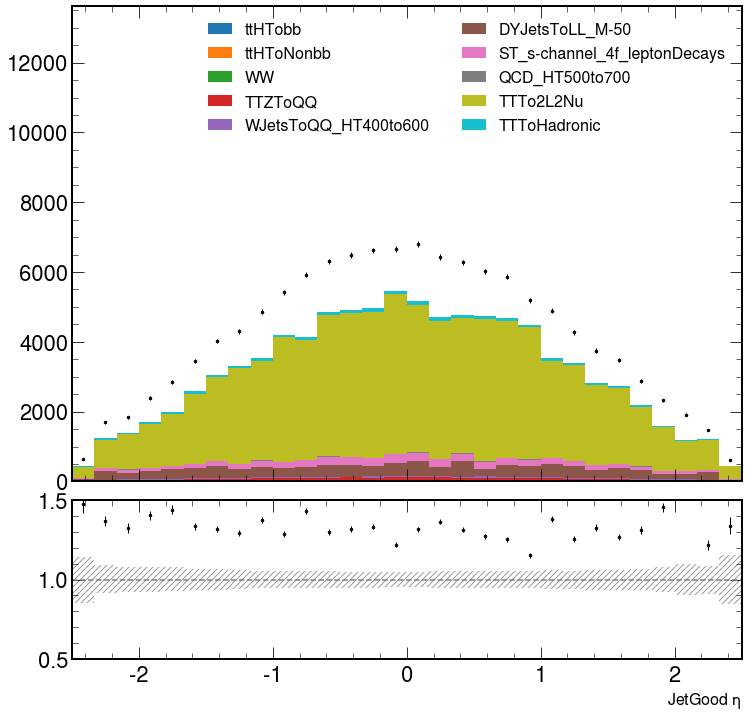

2018 ee JetGood_eta


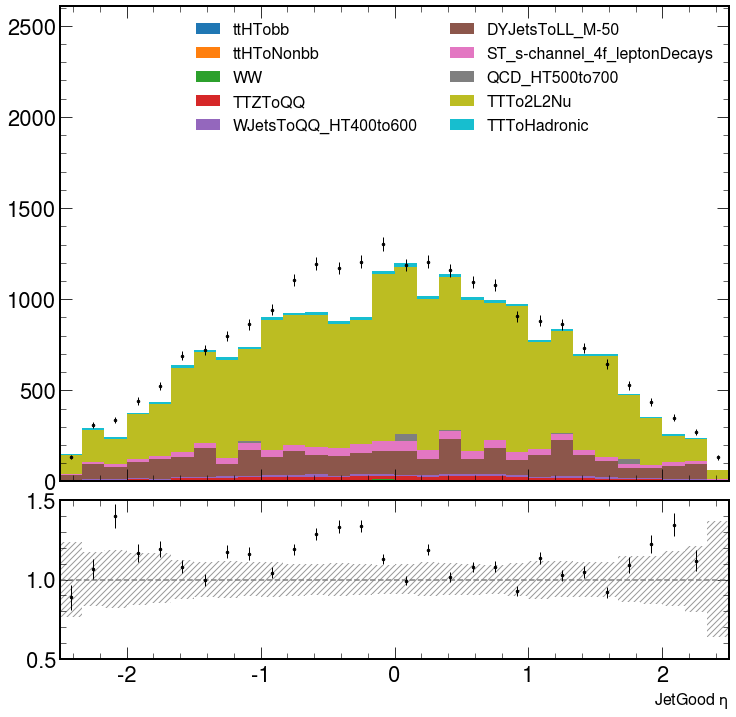

2018 emu JetGood_eta


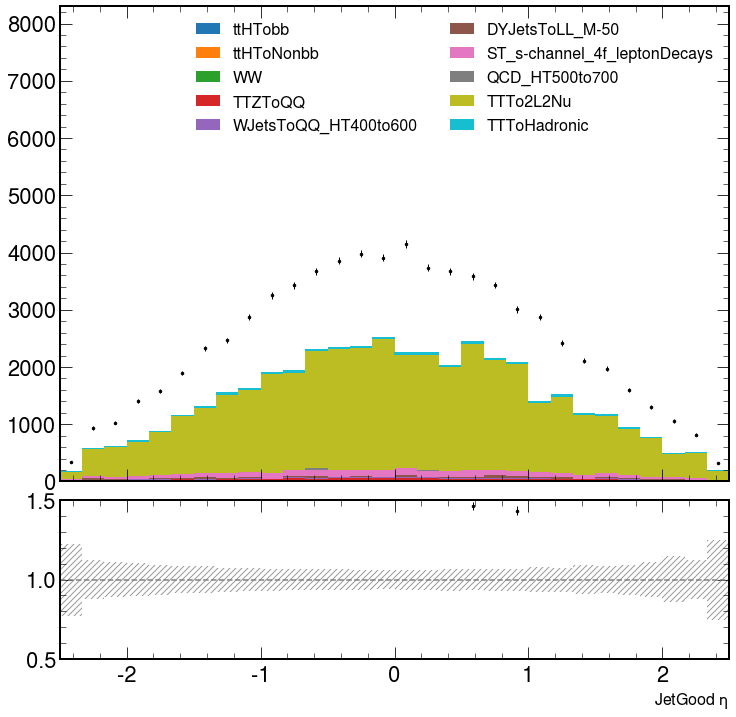

2018 mumu JetGood_eta


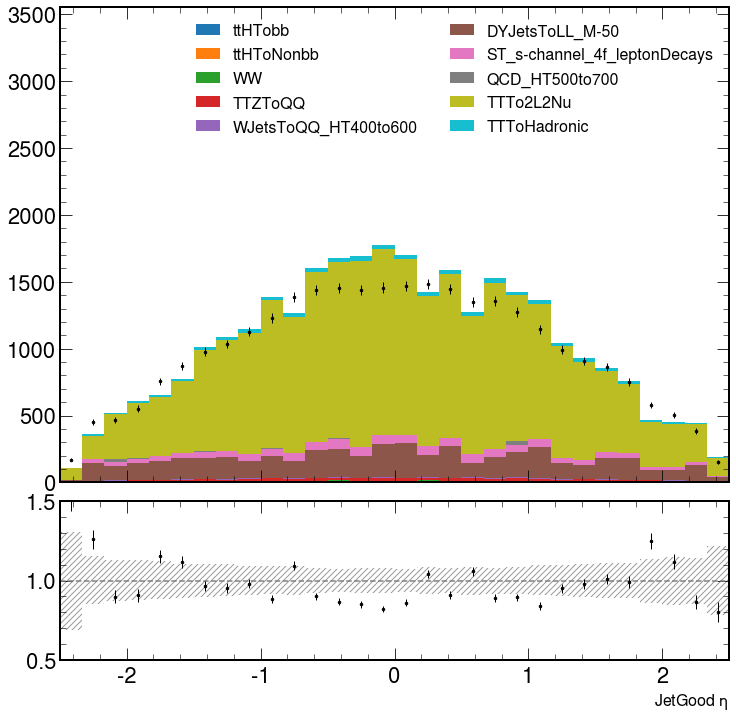

In [6]:
years = ["2018"]
cats = ["baseline","ee","emu","mumu"]
dataSamples = []
for sample in o['columns'].keys():
    if 'DATA' in sample:
        dataSamples.append(sample)
first_sample = 'TTTo2L2Nu'
for year in years:
    for cat in cats: 
        #vars = o['columns'][first_sample+"__nominal"][getName(first_sample)][cat].keys()
        vars = ['JetGood_eta']
        for var in vars:
            if(("weight" in var) or ("Idx" in var) or ("Ttbar" in var)):
                continue
            print(year, cat, var)
            col = var.split("_")[0]
            quantity = var.split("_")[1]
            all_MC = {}
            all_weight = {}
            for label, samples in parameters_dump['plotting_style']['samples_groups'].items():
                label_data = []
                label_weight = {}
                for sample in samples:
                    weight = {}
                    ttbb_weight = {}
                    name = getName(sample)
                    if(("V2" in var) and ("v7" in name)):
                        data = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][var[:-2]].value)
                    else:
                        data = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][var].value)
                    
                    for weightVar in o['columns'][first_sample+"__nominal"][getName(first_sample)][cat].keys():          
                        if ("weight" in weightVar):
                            weight[weightVar] = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][weightVar].value)
                            weight[weightVar] = weight[weightVar] / o['sum_genweights'][name]
                    A = o['sum_genweights_ttB'][name]
                    #if(sample=="TTTo2L2Nu"):
                    if(False):
                            genTtbarId = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat]["events_genTtbarId"].value) % 100
                            tt_ttb_mask = genTtbarId > 50
                            for key in weight:
                                weight[key] = weight[key][~tt_ttb_mask]
                            if(("V2" in var) and ("v7" in name)):
                                ttbb_data = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][var[:-2]].value)
                            else:
                                ttbb_data = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][var].value)
                            genTtbarId = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat]["events_genTtbarId"].value) % 100
                            ttbb_ttb_mask = genTtbarId > 50
                            B = o2['sum_genweights_ttB']['TTbbDiLeptonic_Powheg_2018']
                            for weightVar in o['columns'][first_sample+"__nominal"][getName(first_sample)][cat].keys():
                                if ("weight" in weightVar):
                                    ttbb_weight[weightVar] = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][weightVar].value)
                                    ttbb_weight[weightVar] = ttbb_weight[weightVar] / o2['sum_genweights']['TTbbDiLeptonic_Powheg_2018']
                                    ttbb_weight[weightVar] = ttbb_weight[weightVar][ttbb_ttb_mask]
                                    ttbb_weight[weightVar] = ttbb_weight[weightVar] * (A/B)
                            
                            if(quantity!="N" and col!="events"):
                                colN = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][col+"_N"].value)
                                data = ak.unflatten(data,colN)
                                pt_data = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][col+"_pt"].value)
                                pt_data = ak.unflatten(pt_data,colN)
                                sortIndices = ak.argsort(pt_data,ascending=False)
                                data = data[sortIndices]
                                data = ak.mask(data, ak.num(data) > 1)[:, 0]
                                ttbb_colN = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][col+"_N"].value)
                                ttbb_data = ak.unflatten(ttbb_data,ttbb_colN)
                                ttbb_pt_data = ak.from_numpy(o2['columns']['TTbbDiLeptonic__nominal']['TTbbDiLeptonic_Powheg_2018'][cat][col+"_pt"].value)
                                ttbb_pt_data = ak.unflatten(ttbb_pt_data,ttbb_colN)
                                sortIndices = ak.argsort(ttbb_pt_data,ascending=False)
                                ttbb_data = ttbb_data[sortIndices]
                                ttbb_data = ak.mask(ttbb_data, ak.num(ttbb_data) > 1)[:, 0]
                            data = data[~tt_ttb_mask]
                            ttbb_data = ttbb_data[ttbb_ttb_mask]
                            data = ak.concatenate((data,ttbb_data),axis=0)
                            for key in weight:
                                weight[key] = ak.concatenate((weight[key],ttbb_weight[key]),axis=0)
                    
                    elif(quantity!="N" and col!="events"):
                        colN = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][col+"_N"].value)
                        data = ak.unflatten(data,colN)
                        pt_data = ak.from_numpy(o['columns'][sample+"__nominal"][name][cat][col+"_pt"].value)
                        pt_data = ak.unflatten(pt_data,colN)
                        sortIndices = ak.argsort(pt_data,ascending=False)
                        data = data[sortIndices]
                        data = ak.mask(data, ak.num(data) > 1)[:, 0]
                    for key in weight:
                        weight[key], data = ak.broadcast_arrays(weight[key],data)
                    none_mask = ak.is_none(data)
                    data = data[~none_mask]
                    for key in weight:
                        weight[key] = weight[key][~none_mask]
                    inf_mask = np.isinf(data)
                    data = data[~inf_mask]
                    for key in weight:
                        weight[key] = weight[key][~inf_mask]
                    label_data = ak.concatenate((label_data,data),axis=0)
                    for key in weight:
                        if key not in label_weight:
                            label_weight[key] = []
                        label_weight[key] = ak.concatenate((label_weight[key],weight[key]),axis=0)
                all_MC[label] = label_data
                for key in label_weight:
                    if key not in all_weight:
                        all_weight[key] = {}
                    all_weight[key][label] = label_weight[key]
                
            bins, xmin, xmax, xlabel = getPlotParams(var)
            plt.style.use([hep.style.ROOT, {'font.size': 22}])
            f2, a2 = plt.subplots()
            if not ("Gen" in var) and not ("gen" in var):
                fig, (ax, rax) = plt.subplots(2, 1, figsize=[12,12], gridspec_kw={"height_ratios": [3,1]}, sharex=True)
                fig.subplots_adjust(hspace=0.06)
                if(bins==-1):
                    n, bin_edges, patches = ax.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()))
                else:
                    n, bin_edges, patches = ax.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()),bins=bins,range=(xmin,xmax))
                n_sys = {}
                for key in all_weight:
                    if "Down" in key:
                        continue
                    downString = key[:-2]+"Down"
                    err2_up_total = np.zeros_like(n[-1])
                    err2_down_total = np.zeros_like(n[-1])
                    for label in all_weight[key]:
                        if key=="weight_nominal":
                            mcstat_err2 = np.histogram(all_MC[label], bins=bin_edges, weights=all_weight[key][label]**2)[0]
                            err2_up_total += mcstat_err2
                            err2_down_total += mcstat_err2
                        else:
                            hist_n_up, hist_bins_up = np.histogram(all_MC[label],weights=all_weight[key][label],bins=bin_edges)
                            hist_n_down, hist_bins_down = np.histogram(all_MC[label],weights=all_weight[downString][label],bins=bin_edges)
                            hist_n, hist_bins = np.histogram(all_MC[label],weights=all_weight["weight_nominal"][label],bins=bin_edges)
                            err_up = hist_n_up - hist_n
                            err_down = hist_n_down - hist_n
                            # Compute the flags to check which of the two variations (up and down) are pushing the nominal value up and down
                            up_is_up = err_up > 0
                            down_is_down = err_down < 0
                            # Compute the flag to check if the uncertainty is one-sided, i.e. when both variations are up or down
                            is_onesided = up_is_up ^ down_is_down
                            # Sum in quadrature of the systematic uncertainties taking into account if the uncertainty is one- or double-sided
                            err2_up_twosided = np.where(up_is_up, err_up**2, err_down**2)
                            err2_down_twosided = np.where(up_is_up, err_down**2, err_up**2)
                            err2_max = np.maximum(err2_up_twosided, err2_down_twosided)
                            err2_up_onesided = np.where(is_onesided & up_is_up, err2_max, 0)
                            err2_down_onesided = np.where(is_onesided & down_is_down, err2_max, 0)
                            err2_up_combined = np.where(is_onesided, err2_up_onesided, err2_up_twosided)
                            err2_down_combined = np.where(
                                is_onesided, err2_down_onesided, err2_down_twosided
                            )
                            err2_up_total += err2_up_combined
                            err2_down_total += err2_down_combined
                    n_sys[key] = err2_up_total
                    n_sys[downString] = err2_down_total
                    #print(key,err2_up_total)
                    #print(downString,err2_down_total)
                ax.tick_params(axis='x', labelsize=22)
                ax.tick_params(axis='y', labelsize=22)
                ax.set_xlim(bin_edges[0],bin_edges[-1])
                #systematic error band
                err2_up = np.zeros_like(n[-1])
                err2_down = np.zeros_like(n[-1])
                for key in n_sys:
                    if "Down" in key:
                        continue
                    downString = key[:-2]+"Down"
                    err2_up += n_sys[key]
                    err2_down += n_sys[downString]
                #print("err2_up",err2_up)
                #print("err2_down",err2_down)
                up = n[-1] + np.sqrt(err2_up)
                down = n[-1] - np.sqrt(err2_down)
                ratio_up = np.where(n[-1] != 0, up / n[-1], 1)
                ratio_down = np.where(n[-1] != 0, down / n[-1], 1)
                unc_band = np.array([ratio_down, ratio_up])
                
                rax.fill_between(
                    bin_edges,
                    np.r_[unc_band[0], unc_band[0, -1]],
                    np.r_[unc_band[1], unc_band[1, -1]],
                    label="syst. unc.",
                    color= [0.,0.,0.,0.4],
                    facecolor= [0.,0.,0.,0.],
                    hatch= "////",
                    linewidth= 0,
                    step= 'post',
                    zorder= 2
                )
                rax.hlines(
                    1.0, *bin_edges[[0, -1]], colors='gray', linestyles='dashed'
                )
                
                ax.legend(ncol=2,loc="upper right",fontsize=16)
                plt.xlabel(xlabel,fontsize=16)
                nData = [0.0]*len(bin_edges[:-1])
                for sample in dataSamples:
                    for name in o['columns'][sample].keys():
                        data = ak.from_numpy(o['columns'][sample][name][cat][var].value)
                        if(quantity!="N" and col!="events"):
                            colN = ak.from_numpy(o['columns'][sample][name][cat][col+"_N"].value)
                            data = ak.unflatten(data,colN)
                            pt_data = ak.from_numpy(o['columns'][sample][name][cat][col+"_pt"].value)
                            pt_data = ak.unflatten(pt_data,colN)
                            sortIndices = ak.argsort(pt_data,ascending=False)
                            data = data[sortIndices]
                            data = ak.mask(data, ak.num(data) > 1)[:, 0]
                        none_mask = ak.is_none(data)
                        data = data[~none_mask]
                        inf_mask = np.isinf(data)
                        data = data[~inf_mask]
                        n_data, bin_edges_data, patches_data = a2.hist(data,bins=bin_edges)
                        nData += n_data
                error = np.sqrt(nData)
                binCenters = (bin_edges_data[:-1] + bin_edges_data[1:]) / 2
                ratio = nData/n[-1]
                ratio_error = error/n[-1]
                ratio_error[np.isnan(ratio_error)] = np.inf
                ax.errorbar(binCenters, nData, yerr=error,linestyle='solid',markersize=5.0,color='black',elinewidth=1,linewidth=0,marker='.')
                rax.errorbar(binCenters, ratio, yerr=ratio_error,linestyle='solid',markersize=5.0,color='black',elinewidth=1,linewidth=0,marker='.')
                rax.set_ylim((0.5, 1.5))
                rax.yaxis.set_label_coords(-0.075, 1)
                rax.tick_params(axis='x', labelsize=22)
                rax.tick_params(axis='y', labelsize=22)
                max_data = max(nData)
                max_MC = max(n[-1])
                if(max_data>max_MC):
                    ax.set_ylim((0, 2.0 * max_data))
                else:
                    ax.set_ylim((0, 2.0 * max_MC))
            else:
                f1, a1 = plt.subplots()
                if(bins==-1):
                    n, bin_edges, patches = a1.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()))
                else:
                    n, bin_edges, patches = a1.hist(list(all_MC.values()),weights=list(all_weight["weight_nominal"].values()),stacked=True,label=list(all_MC.keys()),bins=bins,range=(xmin,xmax))
                ax.legend(ncol=2,loc="upper right")
            
            plt.close(f2)
            plt.savefig("hists/"+year+"_"+cat+"_"+var+".pdf")
            plt.show()
            plt.clf()
            plt.cla()
            plt.close()